In [2]:
import cv2
import numpy as np
from IPython.display import Image
from matplotlib import pyplot as plt

## Testing homography techniques using OpenCV

In [3]:
%matplotlib inline

# Read source image.
im_src = cv2.imread('imgs/book2.jpg')
# Four corners of the book in source image
pts_src = np.array([[141.0, 131.0], [480.0, 159.0], [493.0, 630.0],[64.0, 601.0]])


# Read destination image.
im_dst = cv2.imread('imgs/book1.jpg')
# Four corners of the book in destination image.
pts_dst = np.array([[318.0, 256.0],[534.0, 372.0],[316.0, 670.0],[73.0, 473.0]])

# Calculate Homography
h, status = cv2.findHomography(pts_src, pts_dst)

# Warp source image to destination based on homography
im_out = cv2.warpPerspective(im_src, h, (im_dst.shape[1], im_dst.shape[0]))

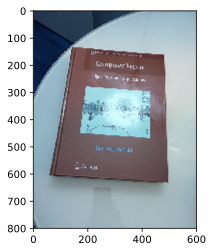

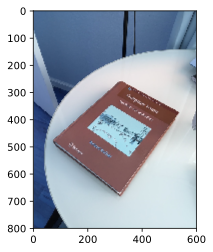

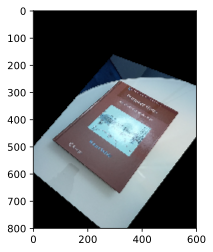

In [4]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

# Display images
plt.imshow(im_src)
plt.show()

plt.imshow(im_dst)
plt.show()

plt.imshow(im_out)
plt.show()

### How to interpret the image output above:

Consider the images above to be labeled Image 1, Image 2, and Image 3 respectively

We took Image 1, warped it so that it matches the orientation of Image 2, and and this result is shown in Image 3.

## Perspective Correction App (need additional packages to run in shell)

In [ ]:
# def get_four_points(im):
    
#     # Set up data to send to mouse handler
#     data = {}
#     data['im'] = im.copy()
#     data['points'] = []
    
#     #Set the callback function for any mouse event
#     cv2.imshow("Image",im)
#     cv2.setMouseCallback("Image", mouse_handler, data)
#     cv2.waitKey(0)
    
#     # Convert array to np.array
#     points = np.vstack(data['points']).astype(float)
    
#     return points

# import cv2
# import numpy as np

# # Read in the image.
# im_src = cv2.imread("imgs/book1.jpg")

# # Destination image
# size = (300,400,3)

# im_dst = np.zeros(size, np.uint8)


# pts_dst = np.array(
#                    [
#                     [0,0],
#                     [size[0] - 1, 0],
#                     [size[0] - 1, size[1] -1],
#                     [0, size[1] - 1 ]
#                     ], dtype=float
#                    )


# print '''
#     Click on the four corners of the book -- top left first and
#     bottom left last -- and then hit ENTER
#     '''

# # Show image and wait for 4 clicks.
# plt.imshow(im_src), plt.show()
# pts_src = get_four_points(im_src);

# # Calculate the homography
# h, status = cv2.findHomography(pts_src, pts_dst)

# # Warp source image to destination
# im_dst = cv2.warpPerspective(im_src, h, size[0:2])

# # Show output
# plt.imshow(im_dst), plt.show()

## Get keypoints from frame of NBA footage

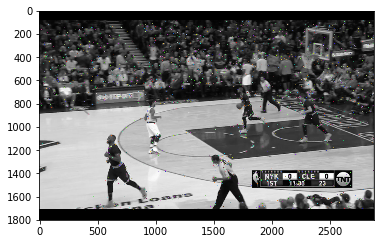

(<matplotlib.image.AxesImage at 0x7fc141124fd0>, None)

In [3]:
import cv2
import numpy as np

pre_keypoint_img = cv2.imread('imgs/cavs.jpg')
gray= cv2.cvtColor(pre_keypoint_img,cv2.COLOR_BGR2GRAY)

sift = cv2.xfeatures2d.SIFT_create()
kp = sift.detect(gray,None)

keypoint_img=cv2.drawKeypoints(gray,kp, None)

plt.imshow(keypoint_img), plt.show()
# plt.savefig('imgs/processed/sift_keypoints.png')

## Testing out homography on NBA court

In [4]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

MIN_MATCH_COUNT = 0

img1 = cv2.imread('imgs/cavs.jpg',0)          # queryImage
img2 = cv2.imread('imgs/fullcourt.png',0) # trainImage

# Initiate SIFT detector
sift = cv2.xfeatures2d.SIFT_create()

# find the keypoints and descriptors with SIFT
kp1, des1 = sift.detectAndCompute(img1,None)
kp2, des2 = sift.detectAndCompute(img2,None)

FLANN_INDEX_KDTREE = 0
index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)
search_params = dict(checks = 50)

flann = cv2.FlannBasedMatcher(index_params, search_params)

matches = flann.knnMatch(des1,des2,k=2)

# store all the good matches as per Lowe's ratio test.
good = []
for m,n in matches:
    if m.distance < 0.7*n.distance:
        good.append(m)

In [5]:
if len(good)>MIN_MATCH_COUNT:
    src_pts = np.float32([ kp1[m.queryIdx].pt for m in good ]).reshape(-1,1,2)
    dst_pts = np.float32([ kp2[m.trainIdx].pt for m in good ]).reshape(-1,1,2)
    


In [ ]:
if len(good)>MIN_MATCH_COUNT:
    src_pts = np.float32([ kp1[m.queryIdx].pt for m in good ]).reshape(-1,1,2)
    dst_pts = np.float32([ kp2[m.trainIdx].pt for m in good ]).reshape(-1,1,2)

    M, mask = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC,5.0)
    matchesMask = mask.ravel().tolist()

    h,w = img1.shape
    pts = np.float32([ [0,0],[0,h-1],[w-1,h-1],[w-1,0] ]).reshape(-1,1,2)
    dst = cv2.perspectiveTransform(pts,M)

    img2 = cv2.polylines(img2,[np.int32(dst)],True,255,3, cv2.CV_AA)

else:
    print "Not enough matches are found - %d/%d" % (len(good),MIN_MATCH_COUNT)
    matchesMask = None

In [ ]:
draw_params = dict(matchColor = (0,255,0), # draw matches in green color
                   singlePointColor = None,
                   matchesMask = matchesMask, # draw only inliers
                   flags = 2)

# img3 = drawMatches(img1,kp1,img2,kp2,good,None,**draw_params)
img3 = drawMatches(img1,kp1,img2,kp2,good)

plt.imshow(img3, 'gray'),plt.show()

In [8]:
print src_pts
print dst_pts

[[[ 2806.90917969   981.78485107]]

 [[ 2067.53149414  1020.25775146]]

 [[ 2246.33837891  1112.83752441]]

 [[ 2276.95922852  1393.46618652]]

 [[  814.15606689  1712.34960938]]]
[[[ 157.00152588  193.96400452]]

 [[ 734.69909668   67.28543854]]

 [[ 139.91716003   33.92361832]]

 [[ 762.69897461  122.1975174 ]]

 [[ 139.91716003   33.92361832]]]


In [29]:
from PIL import Image, ImageDraw

dotSize = 50
x = []
y = []

img = Image.open('imgs/cavs.jpg')
draw = ImageDraw.Draw(img)

for pt in src_pts:
    x = pt[0][0]
    y = pt[0][1]
    draw.rectangle([x,y,x+dotSize-1,y+dotSize-1], fill="pink")

img.save('imgs/test.png', "PNG")

In [31]:
dotSize = 20
x = []
y = []

img = Image.open('imgs/fullcourt.png')
draw = ImageDraw.Draw(img)

for pt in dst_pts:
    x = pt[0][0]
    y = pt[0][1]
    draw.rectangle([x,y,x+dotSize-1,y+dotSize-1], fill="pink")

img.save('imgs/test2.png', "PNG")

In [32]:
!ls imgs

book1.jpg  cavs.jpg	  processed  test.png
book2.jpg  fullcourt.png  test2.png  warriors.jpg


In [16]:
src_pts.shape

(5, 1, 2)

In [ ]:
"""
Replacement function for cv2.drawMatches (only in ver. 2.7.4+)

"""

# def drawMatches(img1, kp1, img2, kp2, matches):
#     """
#     My own implementation of cv2.drawMatches as OpenCV 2.4.9
#     does not have this function available but it's supported in
#     OpenCV 3.0.0

#     This function takes in two images with their associated 
#     keypoints, as well as a list of DMatch data structure (matches) 
#     that contains which keypoints matched in which images.

#     An image will be produced where a montage is shown with
#     the first image followed by the second image beside it.

#     Keypoints are delineated with circles, while lines are connected
#     between matching keypoints.

#     img1,img2 - Grayscale images
#     kp1,kp2 - Detected list of keypoints through any of the OpenCV keypoint 
#               detection algorithms
#     matches - A list of matches of corresponding keypoints through any
#               OpenCV keypoint matching algorithm
#     """

#     # Create a new output image that concatenates the two images together
#     # (a.k.a) a montage
#     rows1 = img1.shape[0]
#     cols1 = img1.shape[1]
#     rows2 = img2.shape[0]
#     cols2 = img2.shape[1]

#     # Create the output image
#     # The rows of the output are the largest between the two images
#     # and the columns are simply the sum of the two together
#     # The intent is to make this a colour image, so make this 3 channels
#     out = np.zeros((max([rows1,rows2]),cols1+cols2,3), dtype='uint8')

#     # Place the first image to the left
#     out[:rows1,:cols1] = np.dstack([img1, img1, img1])

#     # Place the next image to the right of it
#     out[:rows2,cols1:] = np.dstack([img2, img2, img2])

#     # For each pair of points we have between both images
#     # draw circles, then connect a line between them
#     for mat in matches:

#         # Get the matching keypoints for each of the images
#         img1_idx = mat.queryIdx
#         img2_idx = mat.trainIdx

#         # x - columns
#         # y - rows
#         (x1,y1) = kp1[img1_idx].pt
#         (x2,y2) = kp2[img2_idx].pt

#         # Draw a small circle at both co-ordinates
#         # radius 4
#         # colour blue
#         # thickness = 1
#         cv2.circle(out, (int(x1),int(y1)), 4, (255, 0, 0), 1)   
#         cv2.circle(out, (int(x2)+cols1,int(y2)), 4, (255, 0, 0), 1)

#         # Draw a line in between the two points
#         # thickness = 1
#         # colour blue
#         cv2.line(out, (int(x1),int(y1)), (int(x2)+cols1,int(y2)), (255,0,0), 1)


#     # Show the image
#     cv2.imshow('Matched Features', out)
#     cv2.waitKey(0)
#     cv2.destroyWindow('Matched Features')

#     # Also return the image if you'd like a copy
#     return out